In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'

In [3]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [ ]:
with open(path_to_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 5 and x['snr'] == 10)
signal_dict = next(x for x in signals_results if x['id'] == id0)


In [ ]:
CONNECTIONS = 3
DISSIMILARITY = 0.8 ## << DISSIMILARITY >>
BRANCHES = 10
MAX_SPARSITY = 10

dictionary.mmpdfSparVarFromDict(
    signal_dict=signal_dict, 
    connections_level=CONNECTIONS,
    dissimilarity=DISSIMILARITY,
    nb_branches=BRANCHES,
    max_sparsity=MAX_SPARSITY,
    verbose=True
)

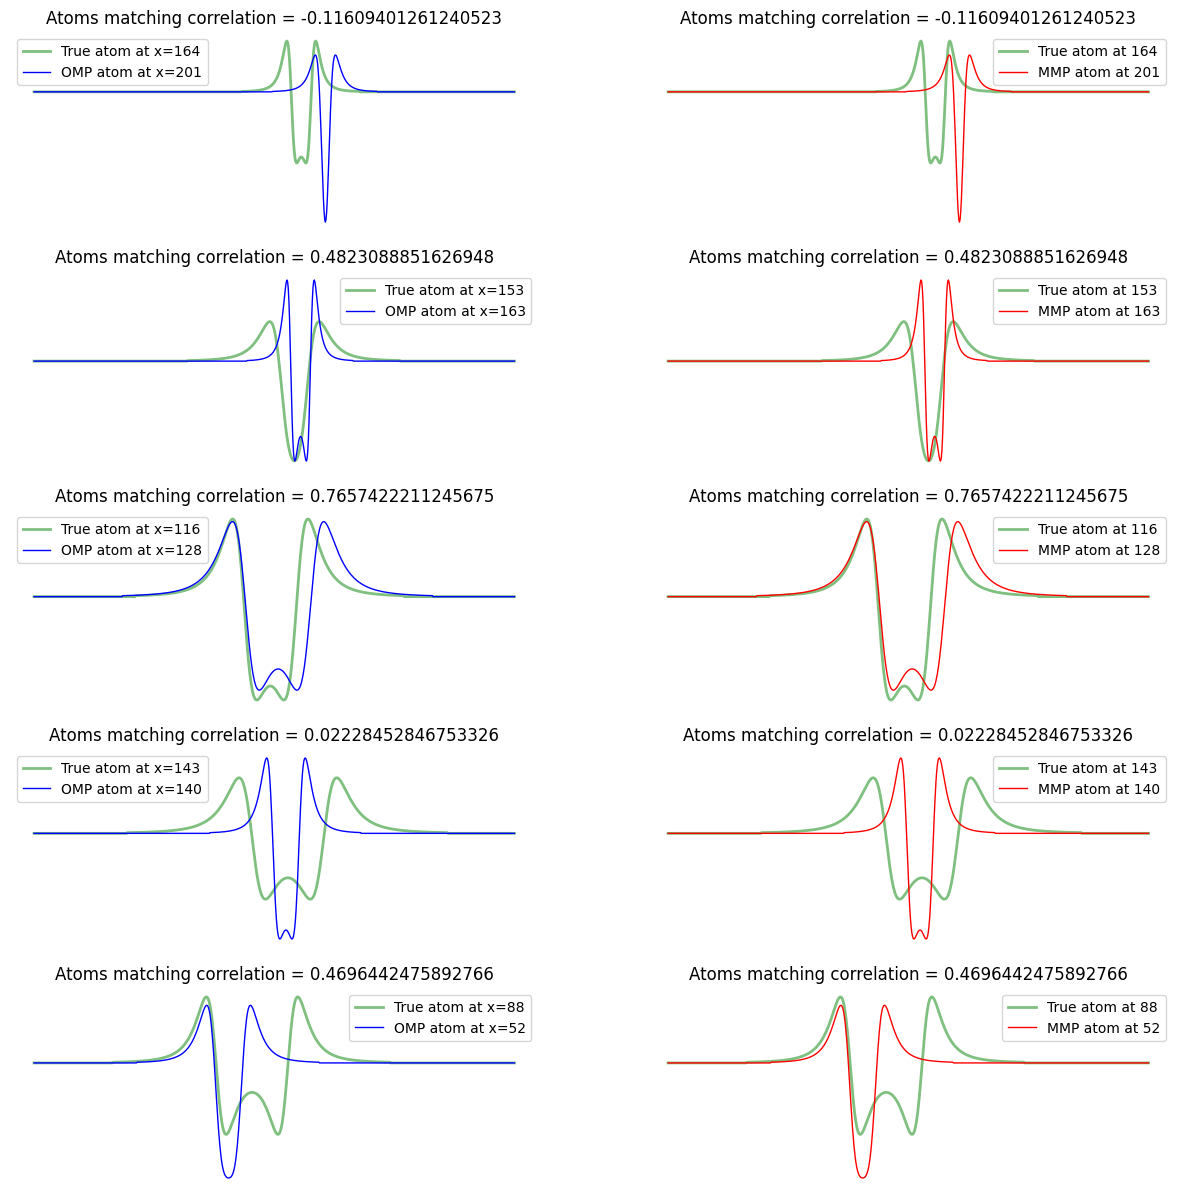

In [ ]:
workbench.plotAtomsPosisitonMatchingFromId(mmpdf_db_path=path_to_mmpdf_db, id=id0)

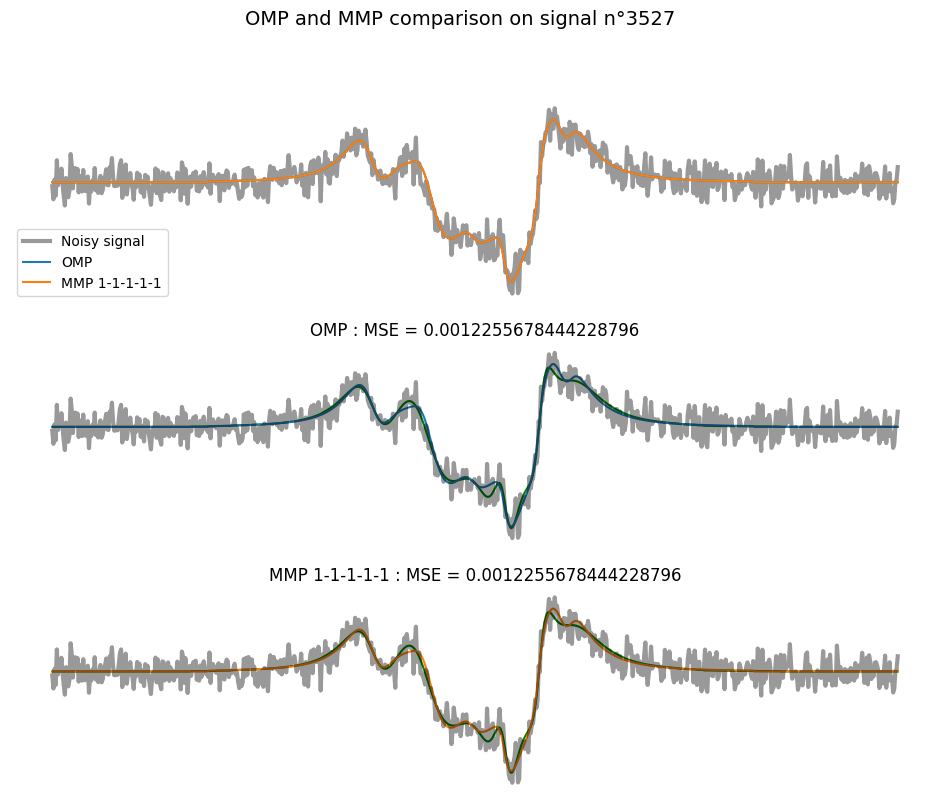

In [ ]:
workbench.plotMMPComparison(path_to_mmpdf_db, id0)